In [ ]:
''''In order to create a sample model, I selected 5 different classes from the Cifar100 dataset.
These classes are clock, keyboard, lamp, telephone, television.
Think of these classes as products of the company we serve.

In [2]:
import tensorflow
import tensorflow as tf
import keras
import os 
from PIL import Image
import matplotlib.pyplot as plt
from keras.datasets import cifar100


(X_train, y_train),(X_test, y_test)=cifar100.load_data()

os.mkdir('/Users/caglaoksuz/Desktop/dataset')
os.mkdir('/Users/caglaoksuz/Desktop/dataset/train')
os.mkdir('/Users/caglaoksuz/Desktop/dataset/test')

###bu for icerisinde cifar100 data seti icerinden istenilen klasorler olusturuluyor
for i in range(100):
    if(i==22):
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/train', 'clock')
        os.mkdir(path)
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/test', 'clock')
        os.mkdir(path)
    if(i==39):
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/train', 'keyboard')
        os.mkdir(path)
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/test', 'keyboard')
        os.mkdir(path)
    if(i==40):
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/train', 'lamp')
        os.mkdir(path)
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/test', 'lamp')
        os.mkdir(path)
    if(i==86):
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/train', 'telephone')
        os.mkdir(path)
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/test', 'telephone')
        os.mkdir(path)
    if(i==87):
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/train', 'television')
        os.mkdir(path)
        path=os.path.join('/Users/caglaoksuz/Desktop/dataset/test', 'television')
        os.mkdir(path) 


In [ ]:
'''This function help me to save the train data in files in an organized manner. I recorded both images and tours.

In [3]:

for i in range(50000):
    if(y_train[i]==22):
        path='/Users/caglaoksuz/Desktop/dataset/train/clock'+'/'+str(i)+ '.png'
        train_data=Image.fromarray(X_train[i])
        plt.imsave(path, X_train[i])
    if(y_train[i]==39):
        path='/Users/caglaoksuz/Desktop/dataset/train/keyboard'+'/'+str(i)+ '.png'
        train_data=Image.fromarray(X_train[i])
        plt.imsave(path, X_train[i])
    if(y_train[i]==40):
        path='/Users/caglaoksuz/Desktop/dataset/train/lamp'+'/'+str(i)+ '.png'
        train_data=Image.fromarray(X_train[i])
        plt.imsave(path, X_train[i])
    if(y_train[i]==86):
        path='/Users/caglaoksuz/Desktop/dataset/train/telephone'+'/'+str(i)+ '.png'
        train_data=Image.fromarray(X_train[i])
        plt.imsave(path, X_train[i])
    if(y_train[i]==87):
        path='/Users/caglaoksuz/Desktop/dataset/train/television'+'/'+str(i)+ '.png'
        train_data=Image.fromarray(X_train[i])
        plt.imsave(path, X_train[i])    
   



In [ ]:
'''This function help me to save test data in files in an orderly manner. I have saved both images and tours.

In [4]:

for i in range(10000):
    if(y_test[i]==22):
        path='/Users/caglaoksuz/Desktop/dataset/test/clock'+'/'+str(i)+ '.png'
        test_data=Image.fromarray(X_test[i])
        plt.imsave(path, X_test[i])
    if(y_test[i]==39):
        path='/Users/caglaoksuz/Desktop/dataset/test/keyboard'+'/'+str(i)+ '.png'
        test_data=Image.fromarray(X_test[i])
        plt.imsave(path, X_test[i])
    if(y_test[i]==40):
        path='/Users/caglaoksuz/Desktop/dataset/test/lamp'+'/'+str(i)+ '.png'
        test_data=Image.fromarray(X_test[i])
        plt.imsave(path, X_test[i])
    if(y_test[i]==86):
        path='/Users/caglaoksuz/Desktop/dataset/test/telephone'+'/'+str(i)+ '.png'
        test_data=Image.fromarray(X_test[i])
        plt.imsave(path, X_test[i])
    if(y_test[i]==87):
        path='/Users/caglaoksuz/Desktop/dataset/test/television'+'/'+str(i)+ '.png'
        test_data=Image.fromarray(X_test[i])
        plt.imsave(path, X_test[i])    
   


In [ ]:
''''I edited the names of the images in the file for limitation. For example, I printed 1 in front of each clock image.

In [5]:
TRAIN_DIR = "/Users/caglaoksuz/Desktop/dataset/train"
TEST_DIR = "/Users/caglaoksuz/Desktop/dataset/test"
CATEGORIES = ["clock", "keyboard", "lamp", "telephone", "television"]
CATEGORIES_2 =["clock", "keyboard", "lamp", "telephone", "television"]
        
def label_img(img):
    word_label = img.split('.')[-1]
    if word_label == '1': return 1
    elif word_label == '2': return 2
    elif word_label == '3': return 3
    elif word_label == '4': return 4
    elif word_label == '5': return 5
  

In [ ]:
''''In this function, it looks at the first object in the name of the picture sent as a parameter and sees the numbers 
I added.
It performs the necessary return operation, so that I reserve which picture belongs to which class, for train data.

In [6]:
from tqdm import tqdm
import random
import numpy as np
import os
import cv2
def create_training_data():
    training_data = []
    
    for category in CATEGORIES:                  #Image dosyalarini cagirmak icin   
        path = os.path.join(TRAIN_DIR,category)  # Image dosyalarinin yollarinin yolunu getirir
        class_num = CATEGORIES.index(category)  
        for img in tqdm(os.listdir(path)):  # goruntuleri sira ile cagiririz
            label = label_img(img)          
            try:                 
                img_array = cv2.imread(os.path.join(path,img))            
                training_data.append([np.array(img_array), np.array(class_num)])        
            except Exception as e:  
                pass
    random.shuffle(training_data)              
    np.save('train_data.npy', training_data)   
    return training_data
    
train_data=create_training_data()      
print(len(train_data))       #toplam train_data sayisini ekrana yazdirdim

100%|██████████| 500/500 [00:00<00:00, 4246.97it/s]

2500


In [ ]:
''''In this function, it looks at the first object in the name of the picture sent as a parameter and sees the numbers I added.
It performs the necessary return operation, so that I reserve which picture belongs to which class. For test data.

In [7]:
def create_test_data():
    testing_data = []
    for category_2 in CATEGORIES_2:       
        path = os.path.join(TEST_DIR,category_2)
        class_num=CATEGORIES_2.index(category_2)        
        for img in tqdm(os.listdir(path)):
            label = label_img(img)         
            try:
                img_array = cv2.imread(os.path.join(path,img))
                testing_data.append([np.array(img_array), class_num])        
            except Exception as e:
                pass           
    random.shuffle(testing_data) #karistirir
    np.save('test_data.npy', testing_data)    
    return testing_data    

test_data=create_test_data()

print(len(test_data))

100%|██████████| 100/100 [00:00<00:00, 2543.48it/s]

500


In [ ]:
'''I created the model using 5 convolutions and 2 dense layers.
I added 2 dropout layers to prevent memorization and increase learning.
I chose relu as the activation function. 
Since I have 5 product classes I created a network with 5 output of the last dense layer.
softmax was chosen as the activation function of as a last layer.



In [9]:
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same'))   #convNet 1
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))                   #covNet  2
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))                   #covNet  3
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))       #Maxpool I                  
model.add(Dropout(0.25))                        #Dropout 1
model.add(Activation('relu'))    
model.add(MaxPooling2D(pool_size=(2, 2)))       #Maxpool II
model.add(Conv2D(128, (3, 3)))                  #covNet 4
model.add(Activation('relu')) 
model.add(Conv2D(256, (3, 3)))                  #covNet 5
model.add(Dropout(0.25))                        #Dropout 2
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))       #Maxpool  III

model.add(Flatten())                            #Flatten#
model.add(Dense(256))                           #Dense 1
model.add(Activation('relu'))
model.add(Dense(512))                           #Dense 2
model.add(Activation('relu'))

model.add(Dense(5, activation='softmax'))       #Dense 3

opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])


In [ ]:
'''After creating the model, 
I need to separate the data in the arrays containing my training and test data as images and labels, 
because the arrays I created from the data set contain the image and the label of that image together in each row. 
With the help of the numpy library, this function was realized in the code below.

In [10]:
X = np.array([i[0] for i in train_data]).reshape(-1,32,32,3)
Y = [i[1] for i in train_data]
Y = np.reshape(Y, (-1, 1))

X_test = np.array([i[0] for i in test_data]).reshape(-1,32,32,3)
Y_test = [i[1] for i in test_data]
Y_test = np.reshape(Y_test, (-1, 1))

In [ ]:
'''Then, to begin the training, 
First of all 
I gave the X variable with my training images and the Y string with my training labels to the fit function.
Then I gave my test data as validation,
and I set the batch_size to 50.

In [11]:
history=model.fit(X, Y, epochs=32,
          batch_size=50,
                  validation_data = (X_test, Y_test), 
                  shuffle=True)

Train on 2500 samples, validate on 500 samples
Epoch 1/32
2500/2500 [==============================] - 27s 11ms/step - loss: 2.4180 - acc: 0.2604 - val_loss: 1.5175 - val_acc: 0.3540
Epoch 2/32
2500/2500 [==============================] - 24s 9ms/step - loss: 1.5383 - acc: 0.3552 - val_loss: 1.4112 - val_acc: 0.4420
Epoch 3/32
2500/2500 [==============================] - 24s 9ms/step - loss: 1.4035 - acc: 0.4128 - val_loss: 1.3650 - val_acc: 0.4680
Epoch 4/32
2500/2500 [==============================] - 24s 9ms/step - loss: 1.2817 - acc: 0.4896 - val_loss: 1.3959 - val_acc: 0.4500
Epoch 5/32
2500/2500 [==============================] - 25s 10ms/step - loss: 1.1987 - acc: 0.5288 - val_loss: 1.2420 - val_acc: 0.5260
Epoch 6/32
2500/2500 [==============================] - 29s 12ms/step - loss: 1.1493 - acc: 0.5636 - val_loss: 1.2245 - val_acc: 0.5420
Epoch 7/32
2500/2500 [==============================] - 29s 12ms/step - loss: 1.0674 - acc: 0.5836 - val_loss: 1.1417 - val_acc: 0.5860
Epoc

In [ ]:
'''I saved the model

In [12]:
Shopify= 'model'
model.save(Shopify)

In [ ]:
''''To be better understood, I made a guess from each class and displayed it.

100%|██████████| 100/100 [00:00<00:00, 857.96it/s]


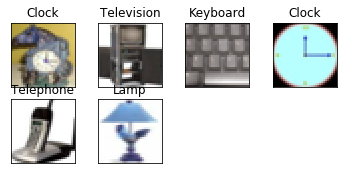

In [13]:
import matplotlib.pyplot as plt
test_data = create_test_data()

fig=plt.figure()

for num,data in enumerate(test_data[:6]):

    img_num = data[1]
    img_data = data[0]

    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(-1,32,32,3)
    model_out = model.predict([data])[0]

    if np.argmax(model_out) == 0: str_label='Clock'
    elif np.argmax(model_out) == 1:  str_label='Keyboard'
    elif np.argmax(model_out) == 2:  str_label='Lamp'
    elif np.argmax(model_out) == 3:  str_label='Telephone'
    elif np.argmax(model_out) == 4:  str_label='Television'
    
           
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [ ]:
'''''The First Graphic
Training accuracy increased and  validation accuracy decreased in some places,
8th is epoch they are closest to each other.
Encountered local minimum points however
managed to hang


The Secound Graphic
While the training loss has decreased, 
the validation loss has decreased by experiencing increases in some places and the gap has widened a little. 
The closest to the epoch is 5. Epoch.

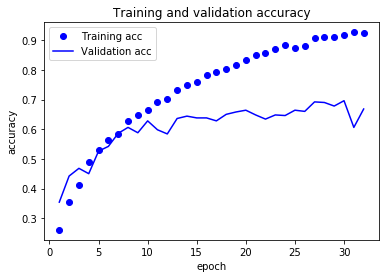

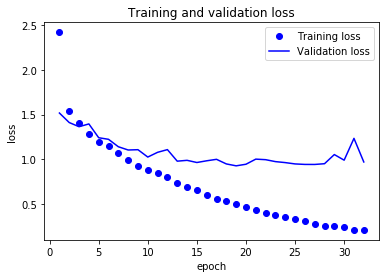

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()